# This notebook visualizes, and analyzes the data

## What the data represents
* Surival: 0 = No, 1 = Yes
* Pclass: A proxy for socio-economic status (SES) 1st (Upper), 2nd (Middle), 3rd (Lower)
* Age: Age of the person
* sibsp: # of sibilings (brother, sister, stepbrother, stepsister)/spouses (husband, wife)
* parch: # of parents (father, mother)/children (daughter, son, stepdaughter, stepson)
* Ticket: Ticker number
* Fare: Passenger Fare
* Cabin: Cabin number
* embarked: Port of Embarkation C (Cherbourg), Q (Queenstown), S (Southampton)

## Import the libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

## Load the training and testing data

In [2]:
train_data = pd.read_csv('Data/train.csv') # .read_csv() reads the csv file
test_data = pd.read_csv('Data/test.csv')   

### Look at how training and testing data are formatted

In [3]:
train_data.head() # prints the first 5 rows of the training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()  # prints the first 5 rows of the testing data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### View # of columns and rows in both training and testing data

In [5]:
print("Total # of rows in training data:", train_data.shape[0])   # gets the num of rows
print("Total # of columns in training data:", train_data.shape[1])# gets the num of columns
print("Total # of rows in testing data:", test_data.shape[0])
print("Total # of columns in testing data:", test_data.shape[1])

Total # of rows in training data: 891
Total # of columns in training data: 12
Total # of rows in testing data: 418
Total # of columns in testing data: 11


# Visualizing and Analyzing the data

## Visualize the data

### Show the total num of null vals in both training & testing data

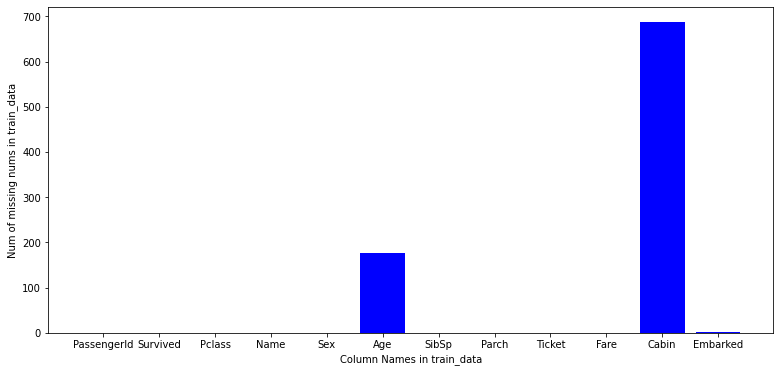

In [6]:
plt.figure(figsize = (13, 6))
plt.bar(train_data.columns, train_data.isna().sum(), color = 'blue')
plt.xlabel("Column Names in train_data")
plt.ylabel("Num of missing nums in train_data")
plt.show()

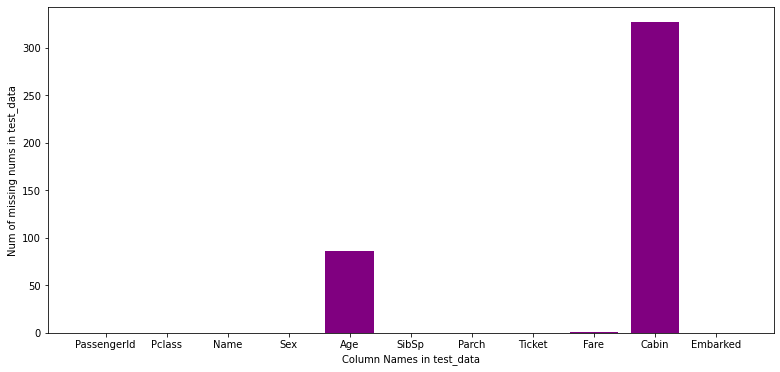

In [7]:
plt.figure(figsize = (13, 6))
plt.bar(test_data.columns, test_data.isna().sum(), color = 'purple')
plt.xlabel("Column Names in test_data")
plt.ylabel("Num of missing nums in test_data")
plt.show()

### Visualize the number of passengers that survived

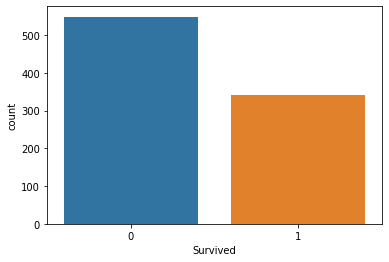

In [8]:
#sns.set(rc={'figure.figsize': (10, 4)})
sns.countplot(x = 'Survived', data = train_data)
plt.show()

# only plot train_data, since there is no Survived Column for test_data
# This countplot shows that around 600 people died, while around 300 survived

### Visualize the number of passengers based on their embarkation port

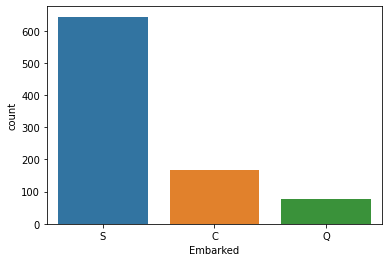

In [9]:
sns.countplot(x = 'Embarked', data = train_data)
plt.show()
# the countplot shows that a majority of the passengers embarked from Southamptom

### Visualize whether gender affected the survival rate or not

[]

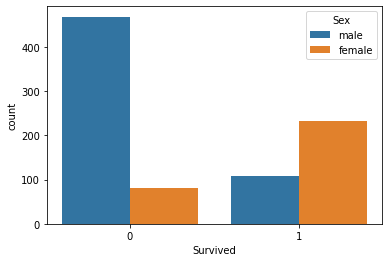

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data) # hue takes column name 'Sex' for color encoding
plt.plot()
# the countplot shows that the death rate for male passengers is more than that for a female

### Visualizing whether pclass affects the survival rate or not

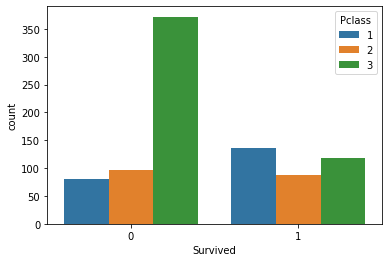

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)
plt.show()
# the countplot shows that people in 3rd class are more likely to die

### Visualizing whether embarked port affects the survival rate or not

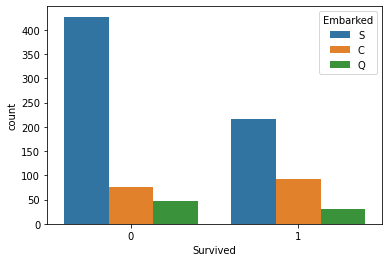

In [12]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_data)
plt.show()
# people that embarked from Southampton, were more likely to die

### Ploting a histogram for age

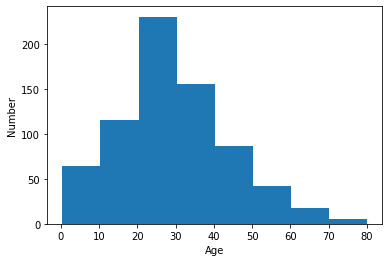

In [13]:
hist_interval = 10 # for spliting the age, and grouping them by 10 years, 0-10, 10-20, 20-30
value_for_bin = np.ceil((train_data.Age.max() - train_data.Age.min()) / hist_interval).astype(int)

plt.hist(train_data.Age, bins = value_for_bin) # a histogram of Age, with 8 bars
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

# the histogram shows that a majority of the passengers are between the ages 20 to 40

### Ploting a histogram for fare price

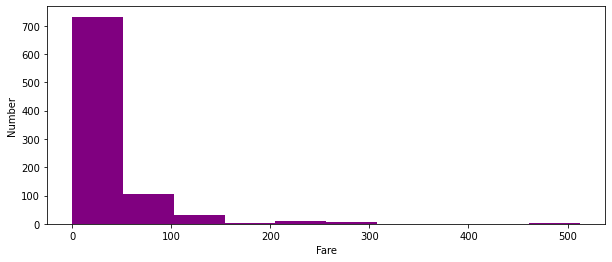

In [14]:
plt.figure(figsize = (10, 4))
plt.hist(train_data.Fare, bins = 10, color = 'purple')
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()

# this histogram shows, that around 700 people paid in between 0 and 50

### Plotting a FacetGrid for passenger's Pclass, Age, and whether they Survived

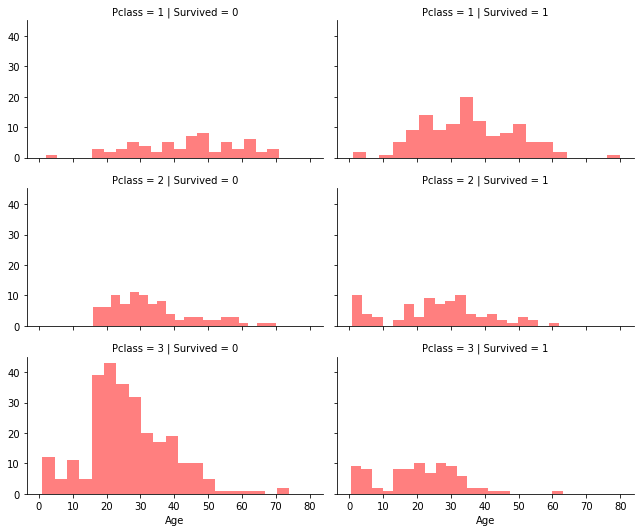

In [15]:
grid = sns.FacetGrid(train_data, row = 'Pclass', col = 'Survived', height = 2.5, aspect = 1.8)
grid.map(plt.hist, 'Age', bins = 20, alpha = 0.5, color = 'red')
plt.show()

# this shows that passengers from 3rd class between the ages ~17 to 30 were more likely to not survive

### Reformat the data to display a heatmap
* categorize gender: male (0), female (1)
* embarkation port: Southampton (0), Cherbourg (1), Queenstown (2) 

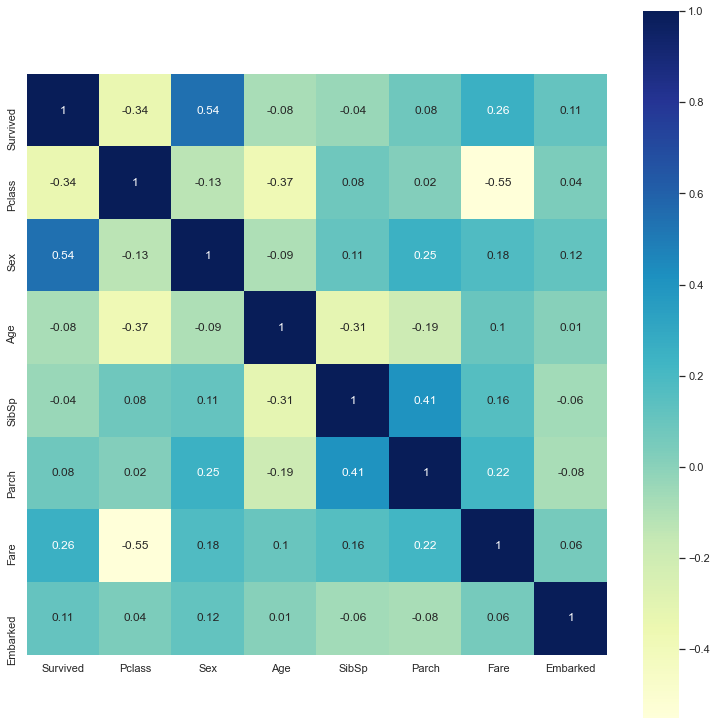

In [16]:
sex_dic = {"male": 0, "female": 1}      # dict to give a numeric value to genders
embarked_dic = {"S": 0, "C": 1, "Q": 2} # dict to give a numeric value to embarkation port 

# the features that will be used to show a heatmap
x_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

train_data.Sex = train_data.Sex.map(sex_dic)                # map the gender of each passenger to the corresponding numeric value
train_data.Embarked = train_data.Embarked.map(embarked_dic) # map the embarkation port of each passenger to the corresponding numeric value

x_df = train_data[x_features]                               # make a dataframe with the x_features that will be used

sns.set(rc={'figure.figsize': (13, 13)})                    # set the size of the heatmap
sns.heatmap(x_df.corr().round(2), square = True, cmap='YlGnBu', annot=True) # display the heatmap
plt.show()

# based on this heatmap, it shows that SibSp and Parch are related
# we could combine the two columns into one new feature to reduce dimension

In [17]:
train_data.head() # displays the first 5 rows of train_data after giving numeric values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


## Simple Analysis of the data

### Surival rate for female and male

In [18]:
sex_dic = {0: "male", 1: "female"}      # dict to reverse the numeric value of Sex back to the original value
embarked_dic = {0: "S", 1: "C", 2: "Q"} # dict to reverse the numeric value of Embarked back to the original value

train_data.Sex = train_data.Sex.map(sex_dic)           
train_data.Embarked = train_data.Embarked.map(embarked_dic)

((train_data.groupby(['Sex', 'Survived']).Survived.count() * 100) / train_data.groupby('Sex').Survived.count())

# females have ~74% chance of survival while males have ~81% chance of death

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

### Survival Rate based on class

In [19]:
# basically we group data by Pclass and if the passenger Survived, so we end up with 6 different values
((train_data.groupby(['Pclass', 'Survived']).Survived.count() * 100) / train_data.groupby('Pclass').Survived.count())

# people in 3rd class were more probable of not surviving
# people in 1st class were more probable of surviving

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

### Survival Rate based on Embarkation Port

In [20]:
((train_data.groupby(['Embarked', 'Survived']).Survived.count() * 100) / train_data.groupby('Embarked').Survived.count())

# people from Southampton were more likely to not survive
# people from Cherbourg were more likely to survive

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

### Survival Rate based on average age

In [21]:
train_data.groupby(['Survived']).mean()['Age']
# the average age of people who survived was around 28 years old
# the average age of people who did not survive was around 30 years old

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64